## Mid Result Screen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Nonnegative Matrix Factorization: V ~ VHat = AB
# Inputs: V = s1 x s2 matrix, maxIter, rank
# Outputs: VHat = s1 x s2 matrix, errors = maxIter x 1 array, B = rank x s2 matrix
def nmf(V,B, maxIter, rank):
    eps = 1e-8
    errors = np.zeros((maxIter,1))

    s1, s2 = V.shape
    A = 10*np.random.rand(s1,rank)
    #B = 100*np.random.rand(rank,s2)

    O = np.ones((s1,s2))

    for i in range(maxIter):
        VHat = np.dot(A,B) 
        VHat = VHat + eps

        # errors[i] = sum(sum( np.multiply(V,np.log(V)) - np.multiply(V,np.log(VHat)) - V + VHat ))
        errors[i] = sum(sum(np.multiply(V,np.log(VHat)) - VHat ))
        #print(errors[i])

        A = np.multiply(A, (np.dot((V/VHat), B.transpose() ) / (np.dot(O,B.transpose()))))
        
        #sA = np.sum(A, axis=0, keepdims=True)
        #A = A/sA
        #B = B*sA.transpose()

        VHat = np.dot(A,B) 
        VHat = VHat + eps

        #B = np.multiply(B, (np.dot(A.transpose(), (V/VHat))) / (np.dot(A.transpose(),O)))  

    VHat = np.dot(A,B) 
    VHat = VHat + eps
    
    return (VHat, errors, B, A)

### Synthetic Data Example 1

$$ V \approx Z_1 Z_2$$

where $V$ is $User x Item$ matrix whose entries are binary values ($0$ or $1$).

$Z_2$ represents the items in a profile.

#### Example 
* 'Keyifciler' profile is defined as users who bought items $0,2,5$, represented as [1,0,1,0,0,1].
* We want to find users who are fit to profile 'Keyifciler'. 
* We keep basis matrix $Z_2$ fixed, apply NMF and find excitation matrix $Z_1$.
* Rows of $Z_1$ represents users. The values of $Z_1$ show how users are related with given profile. 
* Users $1,3,4,6$ have highest values and user $0$ has the lowest value, as it can be seen from $Z_1$ plot. It means that Users $1,3,4,6$ belong 'Keyifciler' profile with higher percentages. 
* Since $V$ matrix contains binary values, the values of $Z_1$ matrix correspond to the ratio of profile items the user bought.

In [2]:
np.random.seed(123)

s1 = 9
s2 = 6
rank = 1

V = np.random.randint(2, size=(s1, s2)) 

Z2 = np.random.randint(2, size=(rank, s2))

print("Z2")
print(Z2)

maxIter = 3
VHat, errors, Z2, Z1 = nmf(V,Z2, maxIter, rank)

ex1Z1 = Z1

Z2
[[1 0 1 0 0 1]]


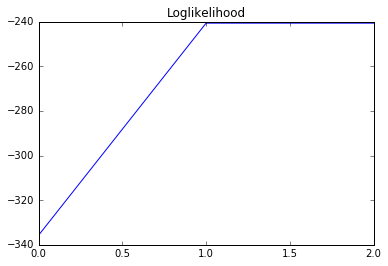

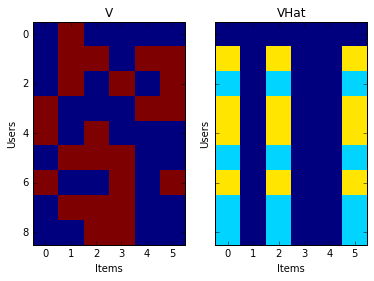

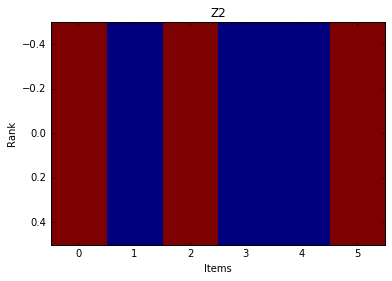

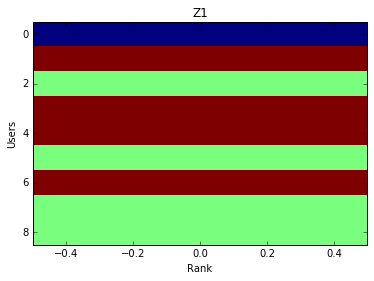

Z1
[[ 0.        ]
 [ 0.66666666]
 [ 0.33333332]
 [ 0.66666666]
 [ 0.66666666]
 [ 0.33333332]
 [ 0.66666666]
 [ 0.33333332]
 [ 0.33333332]]


In [3]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(V, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax1.set_title('V')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest')
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("Z1")
print(Z1)

### Synthetic Data Example 2

$$ V \approx Z_1 Z_2$$

where $V$ is $User x Item$ matrix whose entries are the amount of money spent for items.

$Z_2$ represents the items in a profile.

#### Example 
* 'Keyifciler' profile is defined as users who bought items $0,2,5$, represented as [1,0,1,0,0,1].
* We want to find users who are fit to profile 'Keyifciler'. 
* We keep basis matrix $Z_2$ fixed, apply NMF and find excitation matrix $Z_1$.
* Rows of $Z_1$ represents users. The values of $Z_1$ show how users are related with given profile. 
* Users $6,1,2,3$ have highest values and users $0,7$ have the lowest value, as it can be seen from $Z_1$ plot. It means that Users $6,1,2,3$ belong 'Keyifciler' profile with higher percentages. 

In [4]:
np.random.seed(123)

s1 = 9
s2 = 6
rank = 1

V = np.random.randint(2, size=(s1, s2)) 

Z2 = np.random.randint(2, size=(rank, s2))

V = V * 15 * np.random.rand(s1,s2)

print("Z2")
print(Z2)

maxIter = 3
VHat, errors, Z2, Z1 = nmf(V,Z2, maxIter, rank)
ex2Z1 = Z1

Z2
[[1 0 1 0 0 1]]


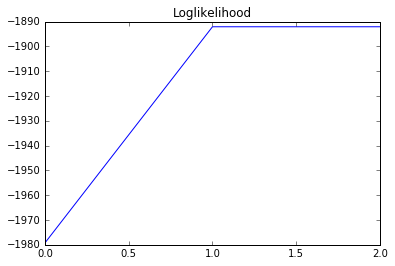

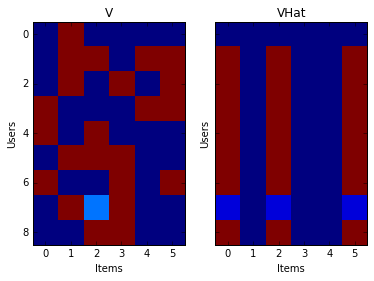

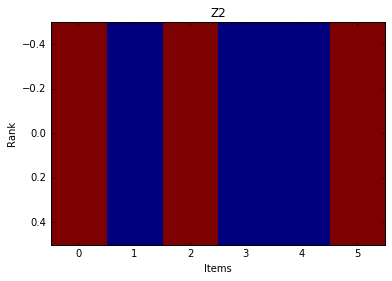

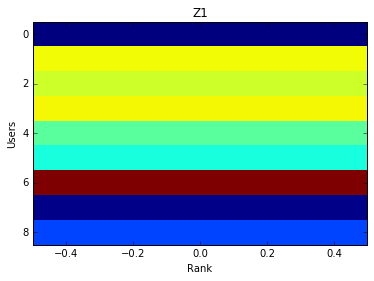

Z1
[[ 0.        ]
 [ 5.29889206]
 [ 4.92779892]
 [ 5.32276562]
 [ 3.79893021]
 [ 3.1245175 ]
 [ 8.24504833]
 [ 0.08064602]
 [ 1.59383212]]


In [5]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(V, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax1.set_title('V')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest')
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("Z1")
print(Z1)

In [6]:
np.random.seed(123)

s1 = 9
s2 = 6
rank = 1

V = np.random.randint(2, size=(s1, s2)) 

Z2 = np.random.randint(2, size=(rank, s2))
Z2 = Z2 + 0.1 * np.ones((rank,s2))

print("Z2")
print(Z2)

maxIter = 3
VHat, errors, Z2, Z1 = nmf(V,Z2, maxIter, rank)
ex3Z1 = Z1

Z2
[[ 1.1  0.1  1.1  0.1  0.1  1.1]]


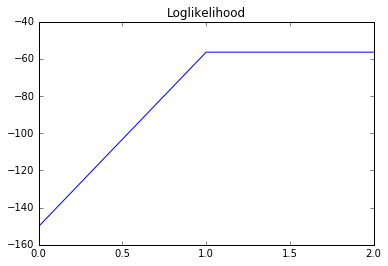

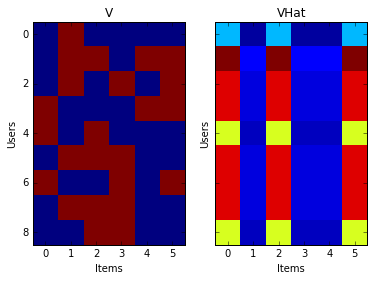

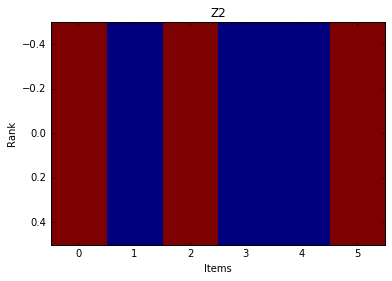

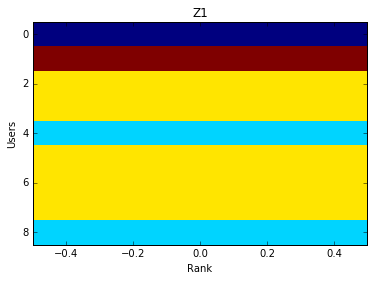

Z1
[[ 0.27777768]
 [ 1.11111106]
 [ 0.83333326]
 [ 0.83333329]
 [ 0.55555555]
 [ 0.83333326]
 [ 0.83333329]
 [ 0.83333326]
 [ 0.5555555 ]]


In [7]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(V, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax1.set_title('V')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest')
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("Z1")
print(Z1)

In [8]:
np.random.seed(123)

s1 = 9
s2 = 6
rank = 1

V = np.random.randint(2, size=(s1, s2)) 

Z2 = np.random.randint(2, size=(rank, s2))
Z2 = Z2 + 0.1 * np.ones((rank,s2))

V = V * 15 * np.random.rand(s1,s2)

print("Z2")
print(Z2)

maxIter = 3
VHat, errors, Z2, Z1 = nmf(V,Z2, maxIter, rank)
ex4Z1 = Z1

Z2
[[ 1.1  0.1  1.1  0.1  0.1  1.1]]


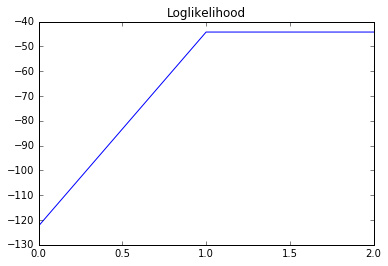

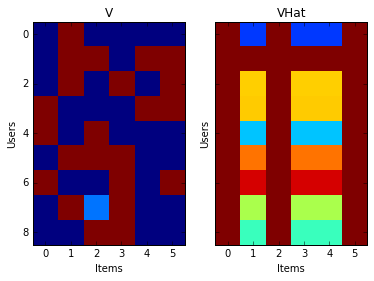

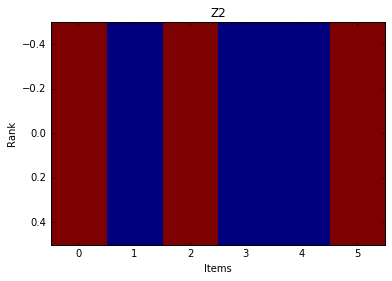

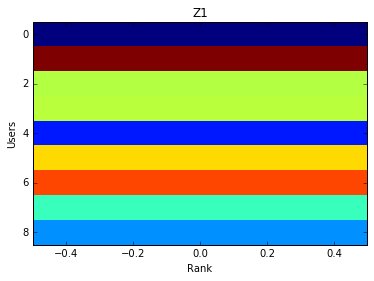

Z1
[[  1.80708812]
 [ 10.73800214]
 [  6.87850563]
 [  6.94838852]
 [  3.16577518]
 [  7.8563712 ]
 [  9.25611091]
 [  5.55823925]
 [  4.21140294]]


In [9]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(V, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax1.set_title('V')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest')
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("Z1")
print(Z1)

### Comparison of Z1 Matrices and User Suitability

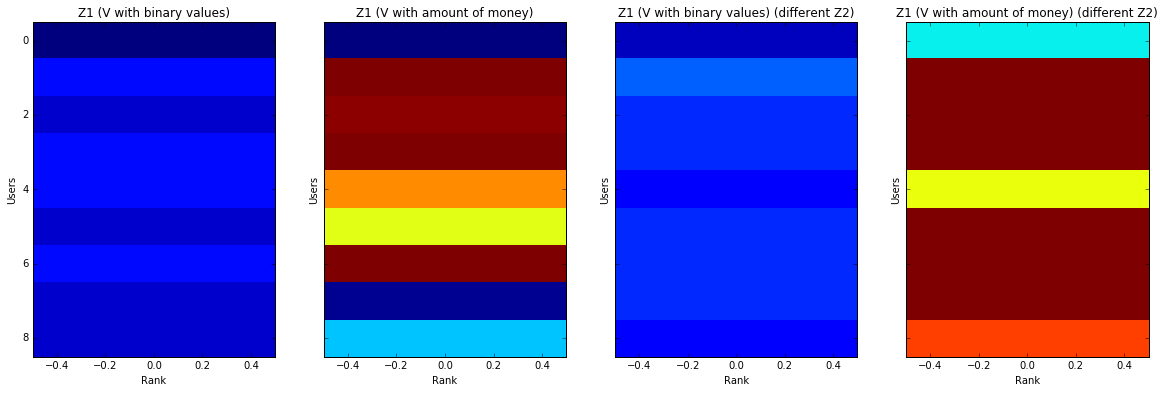

Users ordered by their suitability to given profile.
When V contains binary values, user ordering:
[6 4 3 1 8 7 5 2 0]
3.99999992
0.444444435556
Percentage
[ 100.          100.          100.          100.           79.99999988
   79.99999988   79.99999988   79.99999988   60.00000036]
When V is the amount of money, user ordering:
[6 3 1 2 4 5 8 7 0]
32.3924307816
3.59915897573
Percentage
[ 100.           68.3908336    68.1326028    64.11863635   51.90811387
   44.61326057   28.05644741   11.68891698   10.81660111]
When V contains binary values, different Z2, user ordering:
[1 6 3 5 2 7 4 8 0]
6.66666616061
0.740740684512
Percentage
[ 100.           86.84210564   86.84210564   86.84210421   86.84210421
   86.84210421   73.684212     73.68420985   60.52631262]
When V is the amount of money, different Z2, user ordering:
[1 6 5 3 2 7 8 4 0]
56.4198838841
6.26887598712
Percentage
[ 100.           87.37526868   75.45041396   67.71500314   67.11964728
   55.8718526    44.39769967   35.48964405

In [16]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(20,6))
ax1.imshow(ex1Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=5)
ax1.set_title('Z1 (V with binary values)')
ax1.set_ylabel('Users')
ax1.set_xlabel('Rank')
ax2.imshow(ex2Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=5)
ax2.set_title('Z1 (V with amount of money)')
ax2.set_ylabel('Users')
ax2.set_xlabel('Rank')
ax3.imshow(ex3Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=5)
ax3.set_title('Z1 (V with binary values) (different Z2)')
ax3.set_ylabel('Users')
ax3.set_xlabel('Rank')
ax4.imshow(ex4Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=5)
ax4.set_title('Z1 (V with amount of money) (different Z2)')
ax4.set_ylabel('Users')
ax4.set_xlabel('Rank')
plt.show()

print("Users ordered by their suitability to given profile.")

indices = np.argsort(ex1Z1,axis=0)[::-1].flatten()
print("When V contains binary values, user ordering:")
print(indices)
print(np.sum(ex1Z1))
print(np.mean(ex1Z1))

tempZ1 = ex1Z1 + np.ones((s1,rank))
sortedZ1 = np.sort(tempZ1,axis=0)[::-1].flatten()

percentage = sortedZ1 * 100  / np.max(tempZ1)
print("Percentage")
print(percentage)

indices = np.argsort(ex2Z1,axis=0)[::-1].flatten()
print("When V is the amount of money, user ordering:")
print(indices)
print(np.sum(ex2Z1))
print(np.mean(ex2Z1))

tempZ1 = ex2Z1 + np.ones((s1,rank))
sortedZ1 = np.sort(tempZ1,axis=0)[::-1].flatten()

percentage = sortedZ1 * 100 / np.max(tempZ1)
print("Percentage")
print(percentage)

indices = np.argsort(ex3Z1,axis=0)[::-1].flatten()
print("When V contains binary values, different Z2, user ordering:")
print(indices)
print(np.sum(ex3Z1))
print(np.mean(ex3Z1))

tempZ1 = ex3Z1 + np.ones((s1,rank))
sortedZ1 = np.sort(tempZ1,axis=0)[::-1].flatten()

percentage = sortedZ1 * 100  / np.max(tempZ1)
print("Percentage")
print(percentage)

indices = np.argsort(ex4Z1,axis=0)[::-1].flatten()
print("When V is the amount of money, different Z2, user ordering:")
print(indices)
print(np.sum(ex4Z1))
print(np.mean(ex4Z1))

tempZ1 = ex4Z1 + np.ones((s1,rank))
sortedZ1 = np.sort(tempZ1,axis=0)[::-1].flatten()

percentage = sortedZ1 * 100  / np.max(tempZ1)
print("Percentage")
print(percentage)

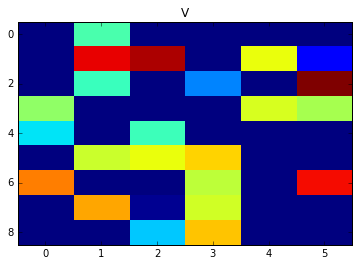

[ 24.38897692  45.76904188  34.81472047  41.76005323  18.4051962
  37.9735952 ]


In [14]:
plt.imshow(V, aspect='auto', interpolation='nearest')
plt.title('V')
plt.show()

print(np.sum(V, axis=0))

### Synthetic Data Example 3
In this example, we generate data with higher number of users and items. 

We also increase the variance of the amount of money spent for items.

In [7]:
np.random.seed(123)

s1 = 90
s2 = 60
rank = 1

V = np.random.randint(2, size=(s1, s2)) 

Z2 = np.random.randint(2, size=(rank, s2))

V = V * 50 * np.random.rand(s1,s2)

maxIter = 3
VHat, errors, Z2, Z1 = nmf(V,Z2, maxIter, rank)

indices = np.argsort(Z1,axis=0)[::-1].flatten()

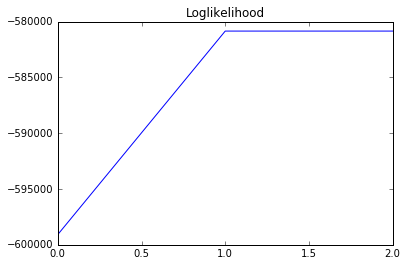

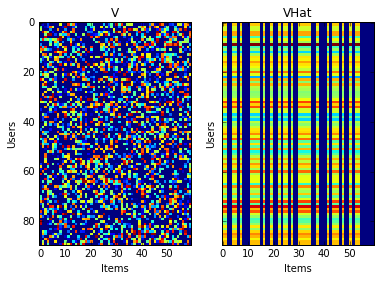

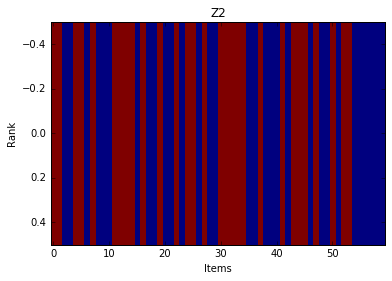

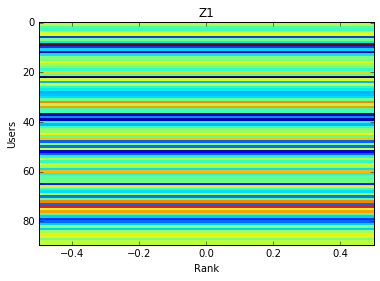

User indices according to their suitability for the profile
[ 9 74 32 72 34 76 60 47 20 66 85 45 57 16  4  5 75 51 23 25 55 86 88 89  1
 69 33 84 44 58 17 43 14 49 82 15  7 87 18  0 31 64 63 62 21 46 71 36 77  2
 35  3 42 19 67 56 40 26 54 61 27  8 13 59 68 30 11 81 78 83 29 41 24 28 38
 70 50 53 80 73 48  6 10 79 65 52 37 12 39 22]


In [8]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(V, aspect='auto', interpolation='nearest')
ax1.set_title('V')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest')
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest')
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("User indices according to their suitability for the profile")
print(indices)

### Obase Data Example - Binary Values

In [21]:
%run loadFundamentalTensor.py
%run collapseTensor.py
%run plotTensor.py

Function Prototypes: 
X, numWeek, numDow, numHour, numItems, numOfCustomers = loadFundamentalTensor(filename)
Example Usage:
X,numWeek,numDow,numHour,numItems,numOfCustomers = loadFundamentalTensor('matfiles/AllHours_Item_Customer_Tensor.mat')  

Instructions
In order to view the code, type: %load loadFundamentalTensor.py
In order to modify the code, to the first line of the cell add: %%writefile loadFundamentalTensor.py
Note that after modifying the code, you should run the cell again: %run loadFundamentalTensor.py
Function Prototypes: 
newTensor = collapseTensor(tensor, dimensions, function)
Tensor must have 5 dimensions, corresponding Week,DoW,Hour,Items,Customers respectively
Indicate dimensions you want to sum over with 1, 0 otherwise
Function must be one of the following: 'sum', 'binary', 'count'
Example Usage:
newTensor = collapseTensor(X, [0,0,1,1,0], 'sum')

Instructions
In order to view the code, type: %load collapseTensor.py
In order to modify the code, to the first line of 

In [37]:
X,numWeek,numDow,numHour,numItems,numOfCustomers = loadFundamentalTensor('files/AllHours_Item_Customer_Tensor.mat',16)  
print(X.shape)

(25, 7, 16, 182, 2500)


In [15]:
View1 = collapseTensor(X,[1,1,1,0,0],'binary')
View1 = View1[0,0,0,:,:].T
print(View1.shape)

(2500, 182)


In [32]:
np.random.seed(11)

s1,s2 = View1.shape
rank = 1

Z2 = np.multiply(np.random.randint(2, size=(rank, s2)), np.random.randint(2, size=(rank, s2)))

maxIter = 3
VHat, errors, Z2, Z1 = nmf(View1, Z2, maxIter, rank)

indices = np.argsort(Z1,axis=0)[::-1].flatten()

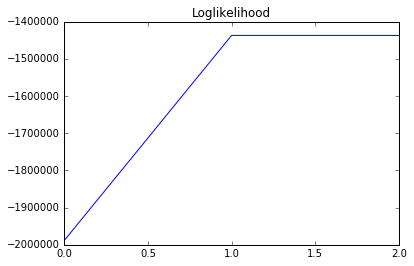

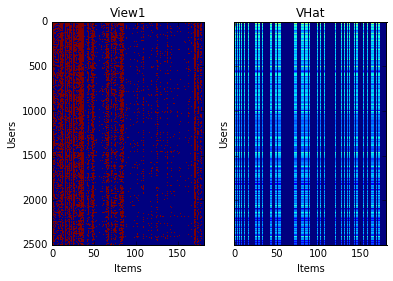

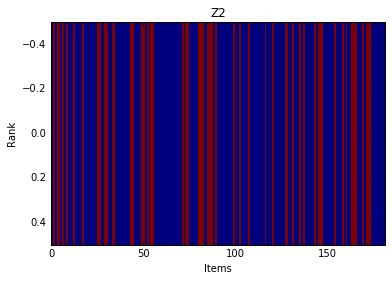

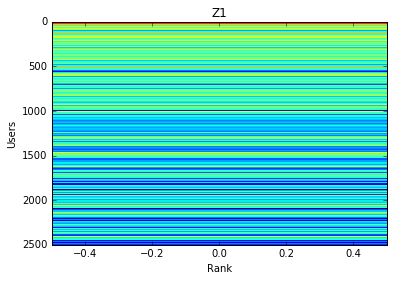

User indices according to their suitability for the profile. First 15 users
[ 75  51  24  27 151 208   3 982  29  63  86  35  23  77 631]


In [33]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(View1, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax1.set_title('View1')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=1)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest')
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("User indices according to their suitability for the profile. First 15 users")
print(indices[0:15])

### Obase Data Example - Amount of Money 

In [29]:
View2 = collapseTensor(X,[1,1,1,0,0],'sum')
View2 = View2[0,0,0,:,:].T
print(View2.shape)

(2500, 182)


In [34]:
np.random.seed(11)

s1,s2 = View2.shape
rank = 1

Z2 = np.multiply(np.random.randint(2, size=(rank, s2)), np.random.randint(2, size=(rank, s2)))

maxIter = 3
VHat, errors, Z2, Z1 = nmf(View2, Z2, maxIter, rank)

indices = np.argsort(Z1,axis=0)[::-1].flatten()

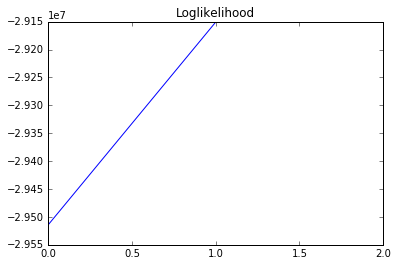

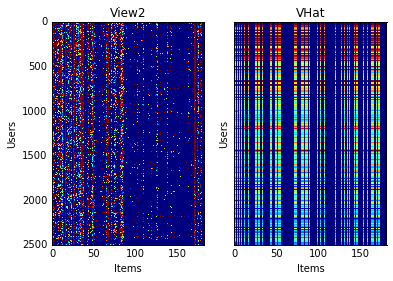

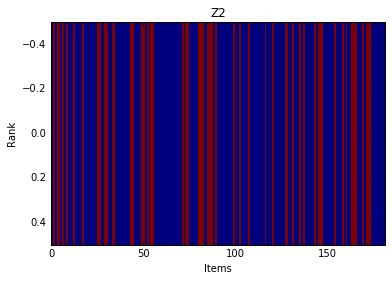

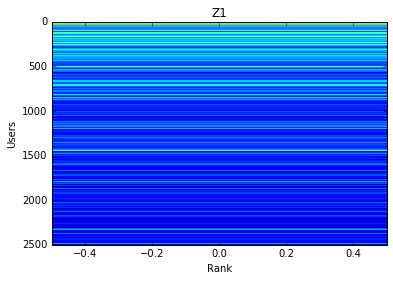

User indices according to their suitability for the profile. First 15 users
[  0  21   2  75   7   9 482  12  31 828  73  11  34   6  39]


In [40]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(View2, aspect='auto', interpolation='nearest', vmin=0, vmax=10)
ax1.set_title('View2')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=10)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=30)
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("User indices according to their suitability for the profile. First 15 users")
print(indices[0:15])

### Etailer Data Example

In [23]:
Tensor,numWeek,numDow,numHour,numItems,numOfCustomers = loadFundamentalTensor('files/Etailer_AllHours_Item_Customer_Tensor_400.mat',24)  
print(Tensor.shape)

(71, 7, 24, 180, 400)


In [24]:
TensorView2 = collapseTensor(Tensor,[1,1,1,0,0],'sum')
TensorView2 = TensorView2[0,0,0,:,:].T
print(TensorView2.shape)

(400, 180)


In [31]:
np.random.seed(123)

s1,s2 = TensorView2.shape
rank = 1

Z2 = np.multiply(np.random.randint(2, size=(rank, s2)), np.random.randint(2, size=(rank, s2)))
Z2 = np.multiply(Z2, np.random.randint(2, size=(rank, s2)))
Z2 = Z2 + 0.1 * np.ones((rank,s2))

maxIter = 3
VHat, errors, Z2, Z1, indices, percentage = nmf(TensorView2, Z2, maxIter, rank)

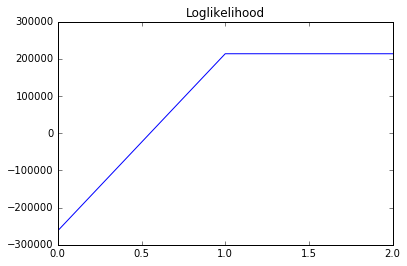

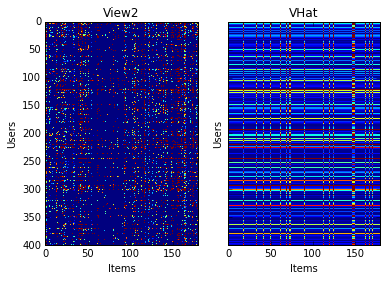

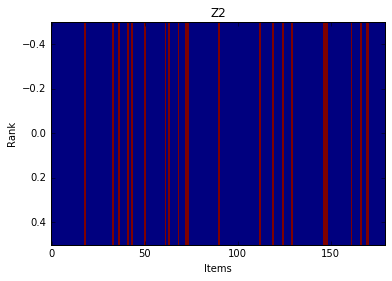

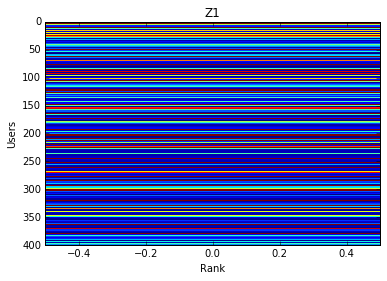

User indices according to their suitability for the profile. First 15 users
[220 142  67 387 293 122 332 193  53 245  57 121 369 225 329 284 300 379
 246 326 174 124 127 213 363 106   5  12  86 305]
Percentage of user suitability for the profile. First 15 users
[ 100.           94.7460677    92.81670597   85.08863564   82.62800984
   80.69370916   58.6419172    55.76968056   51.26451283   44.50317349
   38.98915384   38.70726052   38.55042534   35.23964657   34.22548295
   31.66551888   29.84863491   28.14236495   26.58314546   26.29184017
   24.71193297   23.39257905   22.92831707   22.86075586   22.14926644
   21.85134481   21.79599121   20.97798807   19.55249317   19.25941731]


In [33]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(TensorView2, aspect='auto', interpolation='nearest', vmin=0, vmax=10)
ax1.set_title('View2')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=10)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=30)
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("User indices according to their suitability for the profile. First 15 users")
print(indices[0:30])

print("Percentage of user suitability for the profile. First 15 users")
print(percentage[0:30])

(1, 7, 1, 185, 100)
Customer Index: 76


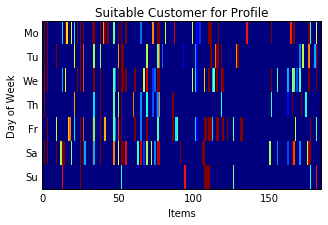

Customer Index: 68


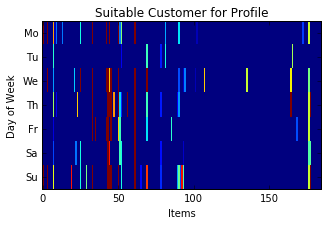

Customer Index: 17


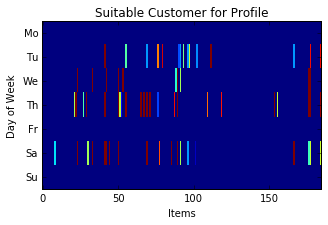

Customer Index: 33


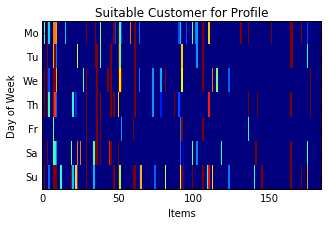

Customer Index: 27


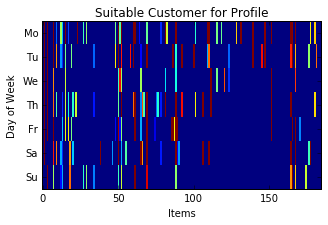

Customer Index: 94


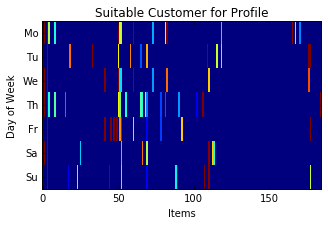

Customer Index: 63


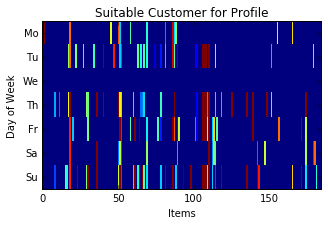

Customer Index: 6


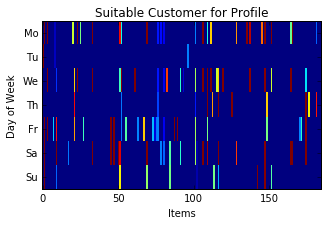

Customer Index: 8


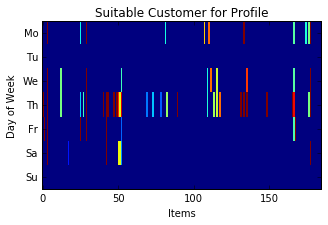

Customer Index: 95


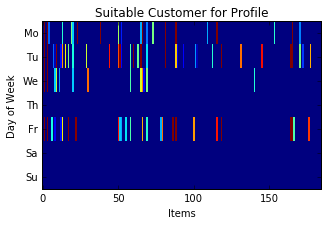

Customer Index: 55


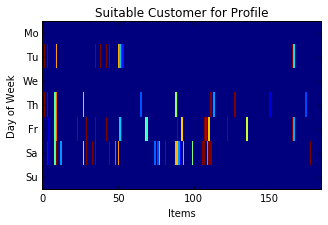

Customer Index: 62


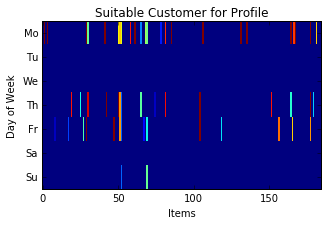

Customer Index: 40


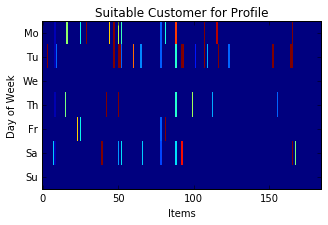

Customer Index: 23


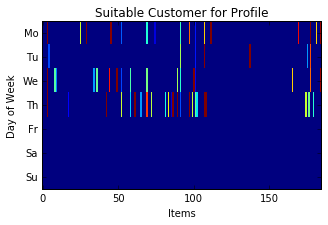

Customer Index: 12


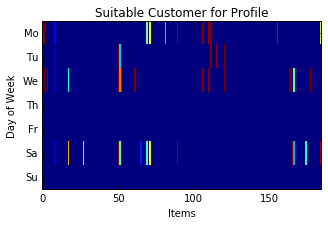

In [70]:
generalView = collapseTensor(Tensor,[1,0,1,0,0],'sum')
print(generalView.shape)

for i in range(15):
    print("Customer Index: %d" % indices[i])
    plotTensor(generalView[:,:,:,:,indices[i],None], numPlots=1, title="Suitable Customer for Profile", vmax=10)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from NMF import nmf

In [20]:
Tensor,numWeek,numDow,numHour,numItems,numOfCustomers = loadFundamentalTensor('files/Etailer_AllHours_Item_Customer_Tensor_400.mat',24)  
print(Tensor.shape)

TensorView2 = collapseTensor(Tensor,[1,1,1,0,0],'sum')
TensorView2 = TensorView2[0,0,0,:,:].T
print(TensorView2.shape)

NameError: name 'loadFundamentalTensor' is not defined

In [6]:
np.random.seed(123)

s1,s2 = TensorView2.shape
rank = 1

Z2 = np.multiply(np.random.randint(2, size=(rank, s2)), np.random.randint(2, size=(rank, s2)))
Z2 = np.multiply(Z2, np.random.randint(2, size=(rank, s2)))


maxIter = 3
VHat, errors, Z2, Z1, indices, percentage = nmf(TensorView2, Z2, maxIter, rank)

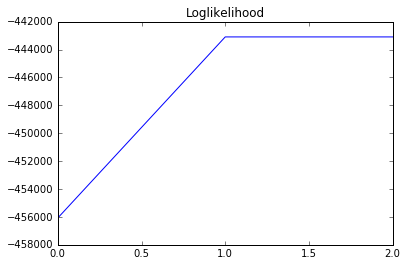

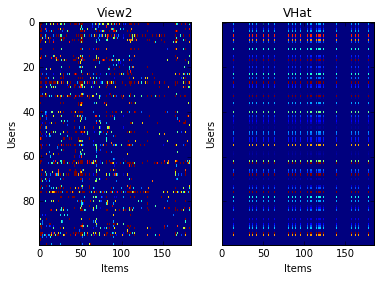

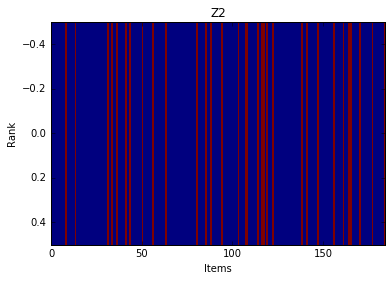

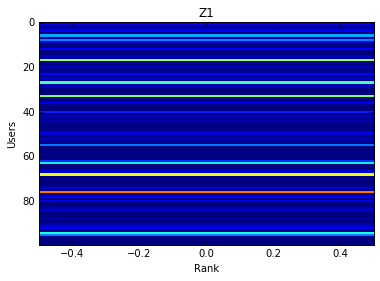

User indices according to their suitability for the profile. First 15 users
[76 68 17 33 27 94 63  6  8 95 55 62 40 23 12]
Percentage of user suitability for the profile. First 15 users
[ 100.           81.62323251   68.70712065   63.72455772   57.0515503
   51.07475745   48.57650115   39.40650559   34.86779529   34.24006084
   33.56794113   24.68327941   23.54194404   20.05579859   19.44074564]


In [9]:
plt.plot(errors)
plt.title('Loglikelihood')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(TensorView2, aspect='auto', interpolation='nearest', vmin=0, vmax=10)
ax1.set_title('View2')
ax1.set_ylabel('Users')
ax1.set_xlabel('Items')
ax2.imshow(VHat, aspect='auto', interpolation='nearest', vmin=0, vmax=10)
ax2.set_title('VHat')
ax2.set_ylabel('Users')
ax2.set_xlabel('Items')
plt.show()

plt.imshow(Z2, aspect='auto', interpolation='nearest')
plt.title('Z2')
plt.ylabel('Rank')
plt.xlabel('Items')
plt.show()

plt.imshow(Z1, aspect='auto', interpolation='nearest', vmin=0, vmax=30)
plt.title('Z1')
plt.ylabel('Users')
plt.xlabel('Rank')
plt.show()

print("User indices according to their suitability for the profile. First 15 users")
print(indices[0:15])

print("Percentage of user suitability for the profile. First 15 users")
print(percentage[0:15])